In [1]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('C:/Users/Choug/Desktop/DATA ANALYTICS/candy-data.csv')

In [4]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


## Exploring the correlation between Sugarpercent and characteristics

In [5]:
sort = df[['competitorname', 'sugarpercent', 'winpercent', 'pricepercent']]

In [6]:
sort.sort_values(['sugarpercent'], ascending=False)

,competitorname,sugarpercent,winpercent,pricepercent
54,ReeseÕs stuffed with pieces,0.988,72.887901,0.651
70,Sugar Babies,0.965,33.437550,0.767
38,Milky Way Simply Caramel,0.965,64.353340,0.860
61,Skittles wildberry,0.941,55.103695,0.220
60,Skittles original,0.941,63.085140,0.220
...,...,...,...,...
12,Chiclets,0.046,24.524988,0.325
30,Lemonhead,0.046,39.141056,0.104
51,ReeseÕs Miniatures,0.034,81.866257,0.279
2,One dime,0.011,32.261086,0.116


In [7]:
rig = df[['sugarpercent', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
               'hard', 'bar', 'pluribus']]

In [8]:
rig

,sugarpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,0.732,1,0,1,0,0,1,0,1,0
1,0.604,1,0,0,0,1,0,0,1,0
2,0.011,0,0,0,0,0,0,0,0,0
3,0.011,0,0,0,0,0,0,0,0,0
4,0.906,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80,0.220,0,1,0,0,0,0,0,0,0
81,0.093,0,1,0,0,0,0,1,0,0
82,0.313,0,1,0,0,0,0,0,0,1
83,0.186,0,0,1,0,0,0,1,0,0


In [9]:
rig.describe().T

,count,mean,std,min,25%,50%,75%,max
sugarpercent,85.0,0.478647,0.282778,0.011,0.22,0.465,0.732,0.988
chocolate,85.0,0.435294,0.498738,0.000,0.00,0.000,1.000,1.000
fruity,85.0,0.447059,0.500140,0.000,0.00,0.000,1.000,1.000
caramel,85.0,0.164706,0.373116,0.000,0.00,0.000,0.000,1.000
peanutyalmondy,85.0,0.164706,0.373116,0.000,0.00,0.000,0.000,1.000
nougat,85.0,0.082353,0.276533,0.000,0.00,0.000,0.000,1.000
crispedricewafer,85.0,0.082353,0.276533,0.000,0.00,0.000,0.000,1.000
hard,85.0,0.176471,0.383482,0.000,0.00,0.000,0.000,1.000
bar,85.0,0.247059,0.433861,0.000,0.00,0.000,0.000,1.000
pluribus,85.0,0.517647,0.502654,0.000,0.00,1.000,1.000,1.000


In [10]:
y, X = dmatrices('sugarpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus', data=df, return_type='dataframe')

In [11]:
y[:3]

,sugarpercent
0,0.732
1,0.604
2,0.011


In [12]:
X[:3]

,Intercept,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mod = sm.OLS(y, X)

In [14]:
res = mod.fit()

In [15]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           sugarpercent   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.198
Date:                Sun, 21 Jun 2020   Prob (F-statistic):              0.309
Time:                        18:07:43   Log-Likelihood:                -7.0331
No. Observations:                  85   AIC:                             34.07
Df Residuals:                      75   BIC:                             58.49
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2341      0.105  

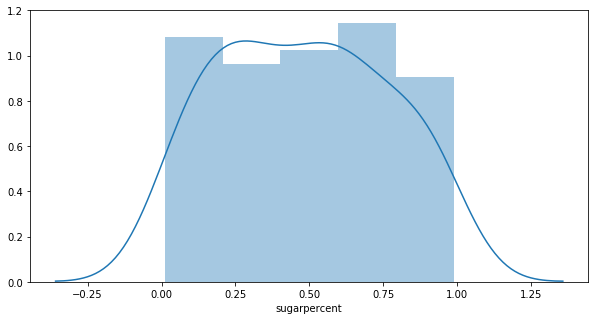

In [16]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(df['sugarpercent'])